# Part II - Prosper Data Analysis Explanation
## by Adewale Isaac


## Investigation Overview


> In this investigation, I wanted to look at the characteristics of customers that made them perform well with loans and also default on loans.


## Dataset Overview

> This dataset expressses the various attributes of 113,937 customers of a Prosper bank from 2005 to 2014.
The columns display different attributes that can be used to describe customers that collected loans from Prosper bank over the period. The brief description of the columns of the dataset can be found in [Prosper Variable definition.](https://docs.google.com/spreadsheets/d/1gDyi_L4UvIrLTEC6Wri5nbaMmkGmLQBk-Yx3z0XDEtI/edit#gid=0) With these datasets, key decisions can be made with regards to loan types, volumes, customer types, period of frequent loan defaults, e.t.c.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
prosper_df = pd.read_csv('prosperLoanData.csv')

In [3]:
# high-level overview of data shape, composition, statistics and attributes
print(prosper_df.shape)
print(prosper_df.dtypes)
#Determining the information about the columns of the dataset
print(prosper_df.info())
#There was no duplication of items in the dataset for Prosper bank
prosper_df.duplicated().sum()

(113937, 81)
ListingKey                              object
ListingNumber                            int64
ListingCreationDate                     object
CreditGrade                             object
Term                                     int64
LoanStatus                              object
ClosedDate                              object
BorrowerAPR                            float64
BorrowerRate                           float64
LenderYield                            float64
EstimatedEffectiveYield                float64
EstimatedLoss                          float64
EstimatedReturn                        float64
ProsperRating (numeric)                float64
ProsperRating (Alpha)                   object
ProsperScore                           float64
ListingCategory (numeric)                int64
BorrowerState                           object
Occupation                              object
EmploymentStatus                        object
EmploymentStatusDuration               float64


0

In [4]:
#Data wrangling
# Filtering the dataset to get the defaulters column of Prosper bank
new_defaulters = []
for col in prosper_df['LoanStatus']:
    if 'Past Due' in col:
        new_defaulters.append(col[:8].replace(" ", ""))#include the first 8 characters which is 'Past Due' and 
        #remove the space in between it
    else:
        new_defaulters.append(col)

#adding the new column to the data frame
prosper_df['new_defaulters'] = new_defaulters
filter_list = ['Defaulted','PastDue','Chargedoff']
prosper_defaulters_df = prosper_df.loc[prosper_df['new_defaulters'].isin(filter_list)]

"""To get the total number of loan defaulters at Prosper bank as 19077 customer out of 113937, i.e about 16.74% of customer
default on loans. This is quite high as it should be within single digits (0 - 9 percent)
"""
prosper_defaulters_df.shape

(19077, 82)

## Bar chart of Loan defaulters

The customers who defaulted most in loans are those **ChargedOff** customers. ChargedOff means the lender or creditor has written the account off as a loss, and the account is closed to future charges. It may be sold to a debt buyer or transferred to a collection agency. It is not surprising to see that this consists of most loans of the bank as it is an accumulation of defaulters (both from PastDue and Defaulted) who fail to repay over time and their debt is charged-off.


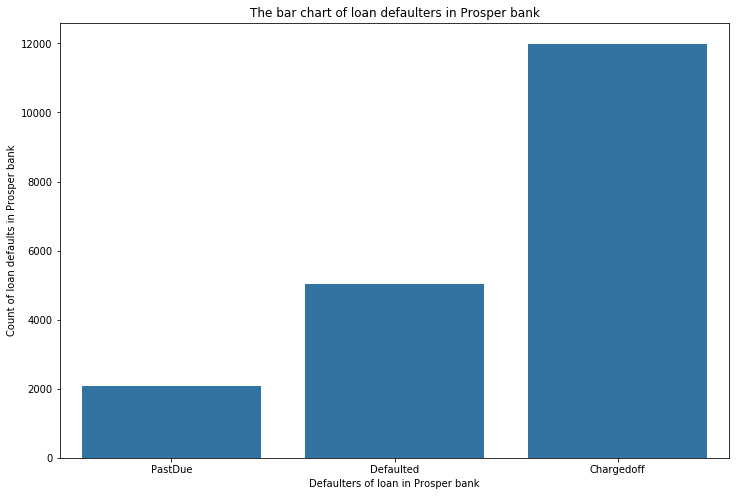

In [5]:
# univariate plot of the LoanStatus
def bar_chart_plot(univariate_arg, df, xlabel, ylabel, title):
    plt.figure(figsize=[12, 8])
    base_color = sb.color_palette()[0]
    type_count = df[univariate_arg].value_counts()
    sb.countplot(data=df, x=univariate_arg, color=base_color);
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title);
    plt.legend()
bar_chart_plot('new_defaulters', prosper_defaulters_df, 'Defaulters of loan in Prosper bank', 
               'Count of loan defaults in Prosper bank', 'The bar chart of loan defaulters in Prosper bank' )

## Distribution of Loan defaulters

From the visualization, the histogram is skewed to the right across all the four quarters and across the three defaulter types. This shows that the customers that collected the smaller loans defaulted more than those that collected higher amount loans

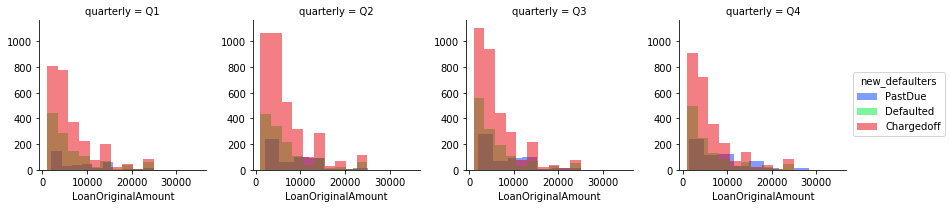

In [6]:
prosper_defaulters_df['quarterly'] = prosper_defaulters_df['LoanOriginationQuarter'].apply(lambda x:x.split()[0])
# multivariate plot of LoanOriginalAmount by quarterly, and new_defaulters
def mult_facet_hist(data, col, hue, palette, hist):
    g = sb.FacetGrid(data = data, col = col, hue = hue, palette = palette);
    g = g.map(plt.hist, hist , alpha = 1/2);
    g.add_legend();

mult_facet_hist(prosper_defaulters_df, "quarterly", 'new_defaulters', 'bright', 'LoanOriginalAmount')

## Bar chart of Credit risk score

Prosper bank majorly avails loans to customers with credit score of 5 and above. With 10 being the best, or lowest risk score and 0 being the worst, or highest risk score respectively. This shows that Propser bank is risk averse.

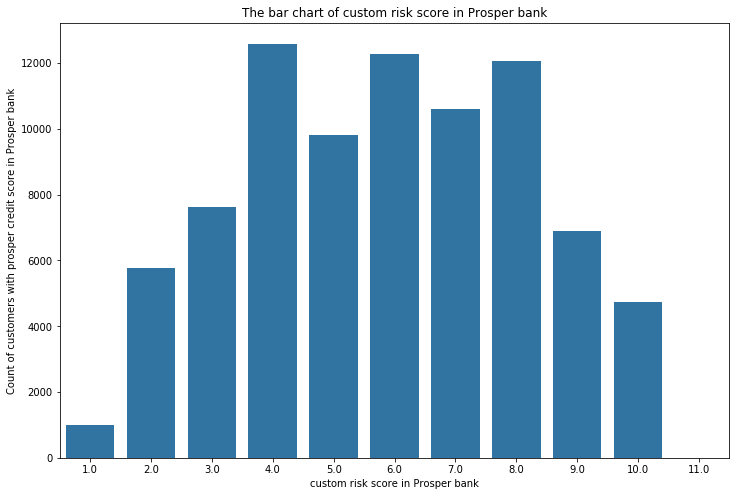

In [7]:
#Filtering the select columns to perform the analysis
cols = ['ProsperScore', 'Recommendations', 'InvestmentFromFriendsCount', 'InvestmentFromFriendsAmount', 'Investors']
prosper_credit_rate_df = prosper_df[cols]

#converting the type of the 'ProsperScore' column' to category
prosper_credit_rate_df["ProsperScore"] = prosper_credit_rate_df["ProsperScore"].astype("category")
# prosper_credit_rate_df.info();

#sorting the 'ProsperScore' column to filter out the NaN values in the dataset
options = [1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0] 
    
# selecting rows based on options 
prosper_credit_rate_df = prosper_credit_rate_df[prosper_credit_rate_df['ProsperScore'].isin(options)] 
prosper_credit_rate_df.shape;
#using the bar_chart function to plot the bar chart
bar_chart_plot('ProsperScore', prosper_credit_rate_df, 'custom risk score in Prosper bank', 
               'Count of customers with prosper credit score in Prosper bank', 'The bar chart of custom risk score in Prosper bank');

## Scatter plot on Relationship between Credit score and Investor and friends of customers

From the visualizations from this dataset above, it is observed that customers with high credit score are not famous among friends as investors as the relationship is inverse. And that most customers with little or no investments from friends are famous with the Prosper bank as per credit score and count of investors investments. We could also infer that most customer that know that they are not Prosper credit worthy would rather obtain investments from friends.

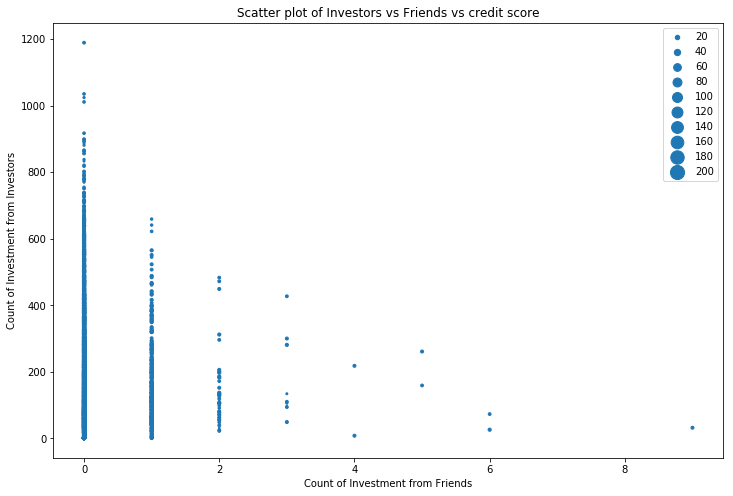

In [8]:
def mult_scatter(data, x, y, s, xlabel, ylabel, title):
    plt.figure(figsize=[12, 8]);
    plt.scatter(data = prosper_credit_rate_df, x = x, y = y, s = s)

    # dummy series for adding legend.
    # This represents the investment from prosper score, s
    sizes = [20, 40, 60, 80, 100, 120, 140, 160, 180, 200]
    base_color = sb.color_palette()[0]
    legend_obj = []
    for s in sizes:
        legend_obj.append(plt.scatter([], [], s = s, color = base_color))
    plt.legend(legend_obj, sizes)
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    plt.title(title)
mult_scatter(prosper_credit_rate_df, 'InvestmentFromFriendsCount', 'Investors', 'ProsperScore', 'Count of Investment from Friends', 'Count of Investment from Investors', 'Scatter plot of Investors vs Friends vs credit score')

## Heatmap on Relationship between Employee status and Loan status

I observed that the customers with employement status of Employed and Full-time performed most in the completed loans status category while that of Employed performed most in the Current status category. In summary, it is advisable to give laons to the Employed consumers as they seem to have the working capital to pay back among the various employment category.

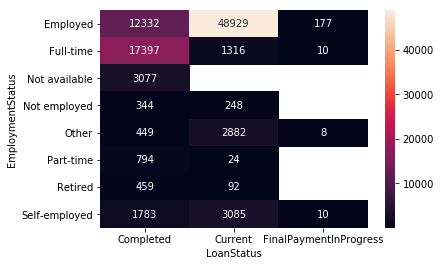

In [9]:
#sorting the 'LoanStatus' column to filter out the non-essential values in the dataset
options = ['Completed', 'Current', 'FinalPaymentInProgress'] 
    
# selecting rows based on options 
prosper_loan_performers_df = prosper_df[prosper_df['LoanStatus'].isin(options)] 
prosper_loan_performers_df.shape
#Using heatmap to show the relationship between the loan Status and the Employment Status
# Use group_by() and size() to get the number of cars and each combination of the two variable levels as a pandas Series
ct_counts = prosper_loan_performers_df.groupby(['LoanStatus', 'EmploymentStatus']).size()

#using reset_index to make it a dataframe
ct_counts = ct_counts.reset_index(name='count')

# Use DataFrame.pivot() to rearrange the data, to have EmploymentStatus class on rows
ct_counts = ct_counts.pivot(index = 'EmploymentStatus', columns = 'LoanStatus', values = 'count');
sb.heatmap(ct_counts, annot = True, fmt = '.0f');

## Strip plot on Relationship between Employment Status, Loan Original Amount and Loan Status

It is observed that Employed customers took the highest loan amounts and are currently operating their loan repayment.Hence, Prosper bank is more interested in giving loans to employed customer for obvious reasons of their salary paying back on the loans. And they least gave loans to Part-time customers compared to the Retired customers. Perhaps the notion is that the Retired customers would repay from their retirement funds compared to Part-time customers that are partially employed and could default from their loans due to business failure.

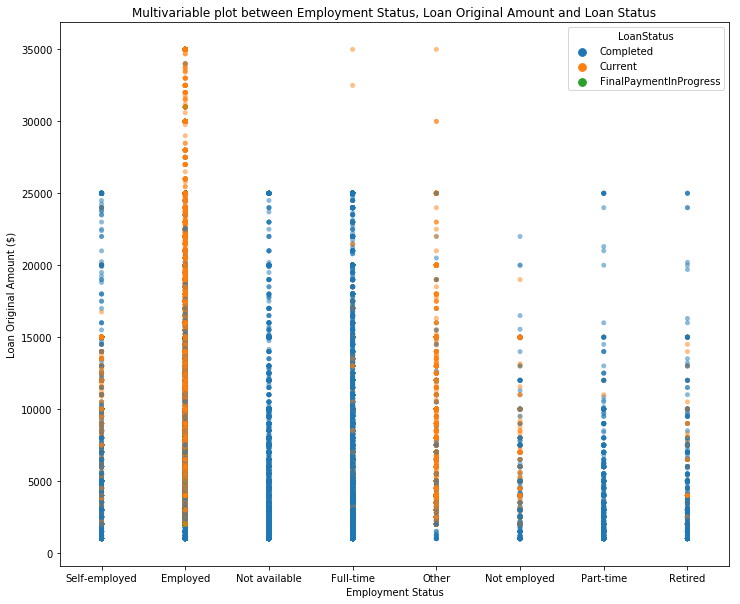

In [10]:
def mult_stripplot(data, x, y, hue, xlabel, ylabel, title):
    plt.figure(figsize = [12, 10]);
    sb.stripplot(data = data, x = x, y = y, hue = hue, alpha = 0.5);
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title);
mult_stripplot(prosper_loan_performers_df, 'EmploymentStatus', 'LoanOriginalAmount', 'LoanStatus', 'Employment Status',
               'Loan Original Amount ($)', 'Multivariable plot between Employment Status, Loan Original Amount and Loan Status')

## Trend of loans over the period of 10years starting from 2004 for Prosper bank

I observed that the loan availment declined from around 2007 till 2009. It is understandable as there was global recession around year 2008. From late 2009, the loan availments started to pick up back even till 2014 as at the prosper data

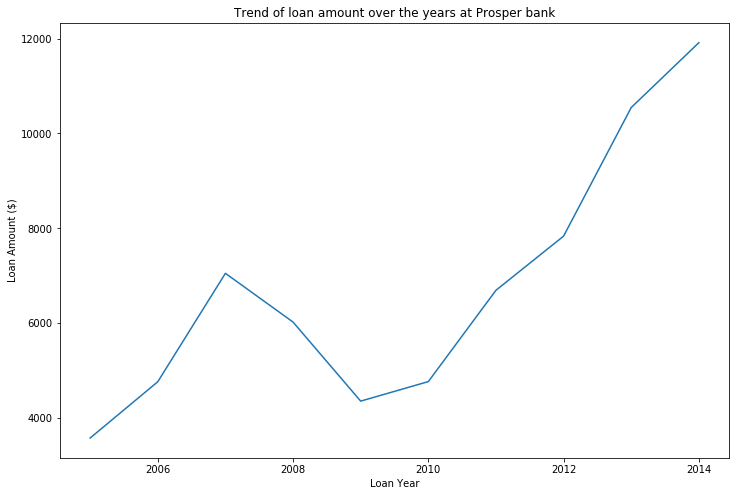

In [11]:
# new data frame with split value columns
new = prosper_df["LoanOriginationQuarter"].str.split(" ", n = 1, expand = True)

# making separate column into year column from new data frame
prosper_df["LoanOriginalYear"]= new[1]

prosper_df.head()
prosper_df["LoanOriginalYear"]= prosper_df["LoanOriginalYear"].astype(int)
prosper_df["LoanOriginalYear"].dtype

# Set a number of bins into which the data will be grouped.
# Set bin edges, and compute center of each bin 
bin_edges = np.arange(2004, 2014+1, 1)
bin_centers = bin_edges[:-1] + 1

# Cut the bin values into discrete intervals. Returns a Series object.
LoanOriginalYear_binned = pd.cut(prosper_df["LoanOriginalYear"], bin_edges, include_lowest = True)
LoanOriginalYear_binned

# For the points in each bin, we compute the mean and standard error of the mean.
amount_mean = prosper_df['LoanOriginalAmount'].groupby(LoanOriginalYear_binned).mean()
amount_std = prosper_df['LoanOriginalAmount'].groupby(LoanOriginalYear_binned).std()

# Plot the summarized data
plt.figure(figsize=[12, 8])
plt.errorbar(x=bin_centers, y=amount_mean);
# plt.errorbar(x=bin_centers, y=amount_mean, yerr=amount_std)
plt.xlabel('Loan Year')
plt.ylabel('Loan Amount ($)');
plt.title('Trend of loan amount over the years at Prosper bank');